In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 131s 1us/step


In [7]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'house', 'ship', 'truck']

In [16]:
train_images.shape

(50000, 32, 32, 3)

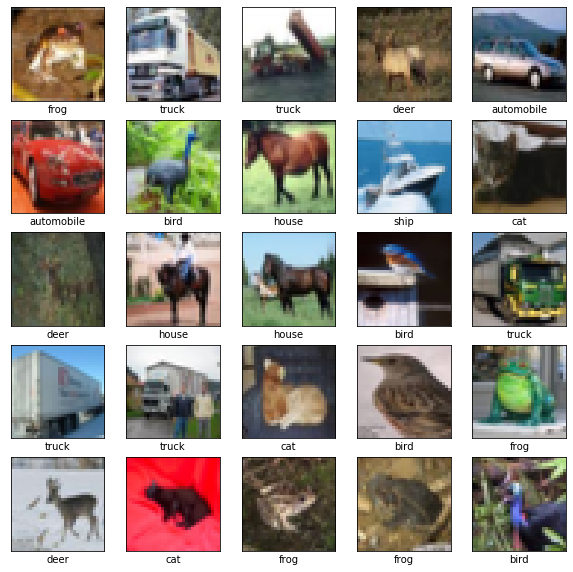

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [52]:
model = models.Sequential()

In [53]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))

In [54]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [55]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [56]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model_fit = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels)
                    )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.5503 - acc: 0.4344 - val_loss: 1.2913 - val_acc: 0.5327
Epoch 2/10
50000/50000 [==============================] - 130s 3ms/sample - loss: 1.1802 - acc: 0.5793 - val_loss: 1.0927 - val_acc: 0.6080
Epoch 3/10
50000/50000 [==============================] - 134s 3ms/sample - loss: 1.0320 - acc: 0.6374 - val_loss: 0.9978 - val_acc: 0.6514
Epoch 4/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 0.9309 - acc: 0.6736 - val_loss: 0.9670 - val_acc: 0.6591
Epoch 5/10
50000/50000 [==============================] - 141s 3ms/sample - loss: 0.8640 - acc: 0.6990 - val_loss: 0.9192 - val_acc: 0.6842
Epoch 6/10
50000/50000 [==============================] - 142s 3ms/sample - loss: 0.8025 - acc: 0.7180 - val_loss: 0.9108 - val_acc: 0.6939
Epoch 7/10
50000/50000 [==============================] - 144s 3ms/sample - loss: 0.7467 - acc: 0.7378 - val_l

 - 6s - loss: 0.8469 - acc: 0.7109


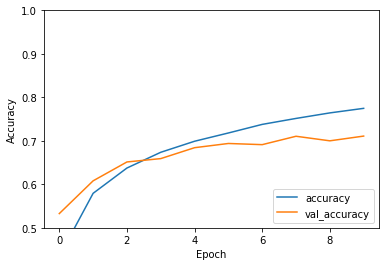

In [59]:
plt.plot(model_fit.history['acc'], label='accuracy')
plt.plot(model_fit.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)